In [3]:
# pip install keras-transformer
# pip install hyperopt

In [2]:
# import pandas as pd
# import numpy as np

# df = pd.read_csv(f'./DNN-EdgeIIoT-dataset.csv', low_memory=False) 
# df.head(5)
# print(df['Attack_type'].value_counts())

In [3]:
# from sklearn.utils import shuffle
# drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 
#                 "http.file_data","http.request.full_uri","icmp.transmit_timestamp",
#                 "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
#                 "tcp.dstport", "udp.port", "mqtt.msg"]

# df.drop(drop_columns, axis=1, inplace=True)
# df.dropna(axis=0, how='any', inplace=True)
# df.drop_duplicates(subset=None, keep="first", inplace=True)
# df = shuffle(df)
# df.isna().sum()
# print(df['Attack_type'].value_counts())

In [4]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn import preprocessing

# def encode_text_dummy(df, name):
#     dummies = pd.get_dummies(df[name])
#     for x in dummies.columns:
#         dummy_name = f"{name}-{x}"
#         df[dummy_name] = dummies[x]
#     df.drop(name, axis=1, inplace=True)
    
# encode_text_dummy(df,'http.request.method')
# encode_text_dummy(df,'http.referer')
# encode_text_dummy(df,"http.request.version")
# encode_text_dummy(df,"dns.qry.name.len")
# encode_text_dummy(df,"mqtt.conack.flags")
# encode_text_dummy(df,"mqtt.protoname")
# encode_text_dummy(df,"mqtt.topic")

In [5]:
# df.to_csv('preprocessed_DNN.csv', encoding='utf-8', index=False)

In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('./preprocessed_DNN2.csv', low_memory=False)

# Assuming 'Attack_type' is the column you want to analyze
attack_type_col = "Attack_type"

# Get unique attack types
unique_attack_types = df[attack_type_col].unique()

# Display individual attack type counts
for attack_type in unique_attack_types:
    count = df[df[attack_type_col] == attack_type].shape[0]
    print(f"{attack_type}: {count} instances")


Normal: 1363998 instances
DDoS_UDP: 121567 instances
DDoS_TCP: 50062 instances
SQL_injection: 50826 instances
Vulnerability_scanner: 50026 instances
DDoS_ICMP: 67939 instances
Password: 49933 instances
DDoS_HTTP: 48544 instances
Uploading: 36807 instances
Backdoor: 24026 instances
XSS: 15066 instances
Port_Scanning: 19977 instances
Fingerprinting: 853 instances
Ransomware: 9689 instances
MITM: 358 instances


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('./preprocessed_DNN.csv', low_memory=False) 
df

arp.opcode  arp.hw.size  icmp.checksum  icmp.seq_le  icmp.unused  \
0               0.0          0.0            0.0          0.0          0.0   
1               0.0          0.0            0.0          0.0          0.0   
2               0.0          0.0            0.0          0.0          0.0   
3               0.0          0.0            0.0          0.0          0.0   
4               0.0          0.0            0.0          0.0          0.0   
...             ...          ...            ...          ...          ...   
1909666         0.0          0.0            0.0          0.0          0.0   
1909667         0.0          0.0            0.0          0.0          0.0   
1909668         0.0          0.0            0.0          0.0          0.0   
1909669         0.0          0.0            0.0          0.0          0.0   
1909670         0.0          0.0            0.0          0.0          0.0   

         http.content_length  http.response  http.tls_port    tcp.ack  \
0                        0.0            0.0            0.0       15.0   
1                        0.0            0.0            0.0       15.0   
2                        0.0            0.0            0.0       59.0   
3                        0.0            0.0            0.0   281182.0   
4                        0.0            0.0            0.0    66715.0   
...                      ...            ...            ...        ...   
1909666                  0.0            0.0            0.0        1.0   
1909667                  0.0            0.0            0.0  1957646.0   
1909668                  0.0            0.0            0.0        6.0   
1909669                  0.0            0.0            0.0       59.0   
1909670                  0.0            0.0            0.0       59.0   

          tcp.ack_raw  ...  mqtt.conack.flags-1471198  \
0        3.294287e+09  ...                      False   
1        3.515283e+09  ...                      False   
2        3.475212e+09  ...                      False   
3        2.371906e+09  ...                      False   
4        2.371691e+09  ...                      False   
...               ...  ...                        ...   
1909666  3.731615e+09  ...                      False   
1909667  1.142845e+09  ...                      False   
1909668  3.002137e+09  ...                      False   
1909669  2.656079e+09  ...                      False   
1909670  2.094457e+09  ...                      False   

         mqtt.conack.flags-1471199  mqtt.conack.flags-1574358  \
0                            False                      False   
1                            False                      False   
2                            False                      False   
3                            False                      False   
4                            False                      False   
...                            ...                        ...   
1909666                      False                      False   
1909667                      False                      False   
1909668                      False                      False   
1909669                      False                      False   
1909670                      False                      False   

         mqtt.conack.flags-1574359  mqtt.protoname-0  mqtt.protoname-0.0  \
0                            False              True               False   
1                            False              True               False   
2                            False              True               False   
3                            False              True               False   
4                            False              True               False   
...                            ...               ...                 ...   
1909666                      False             False               False   
1909667                      False              True               False   
1909668                      False              True     

In [2]:
feat_cols = list(df.columns)
label_col = "Attack_type"

feat_cols.remove(label_col)
feat_cols
len(feat_cols)

96

In [3]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]
empty_cols

[]

<Axes: >

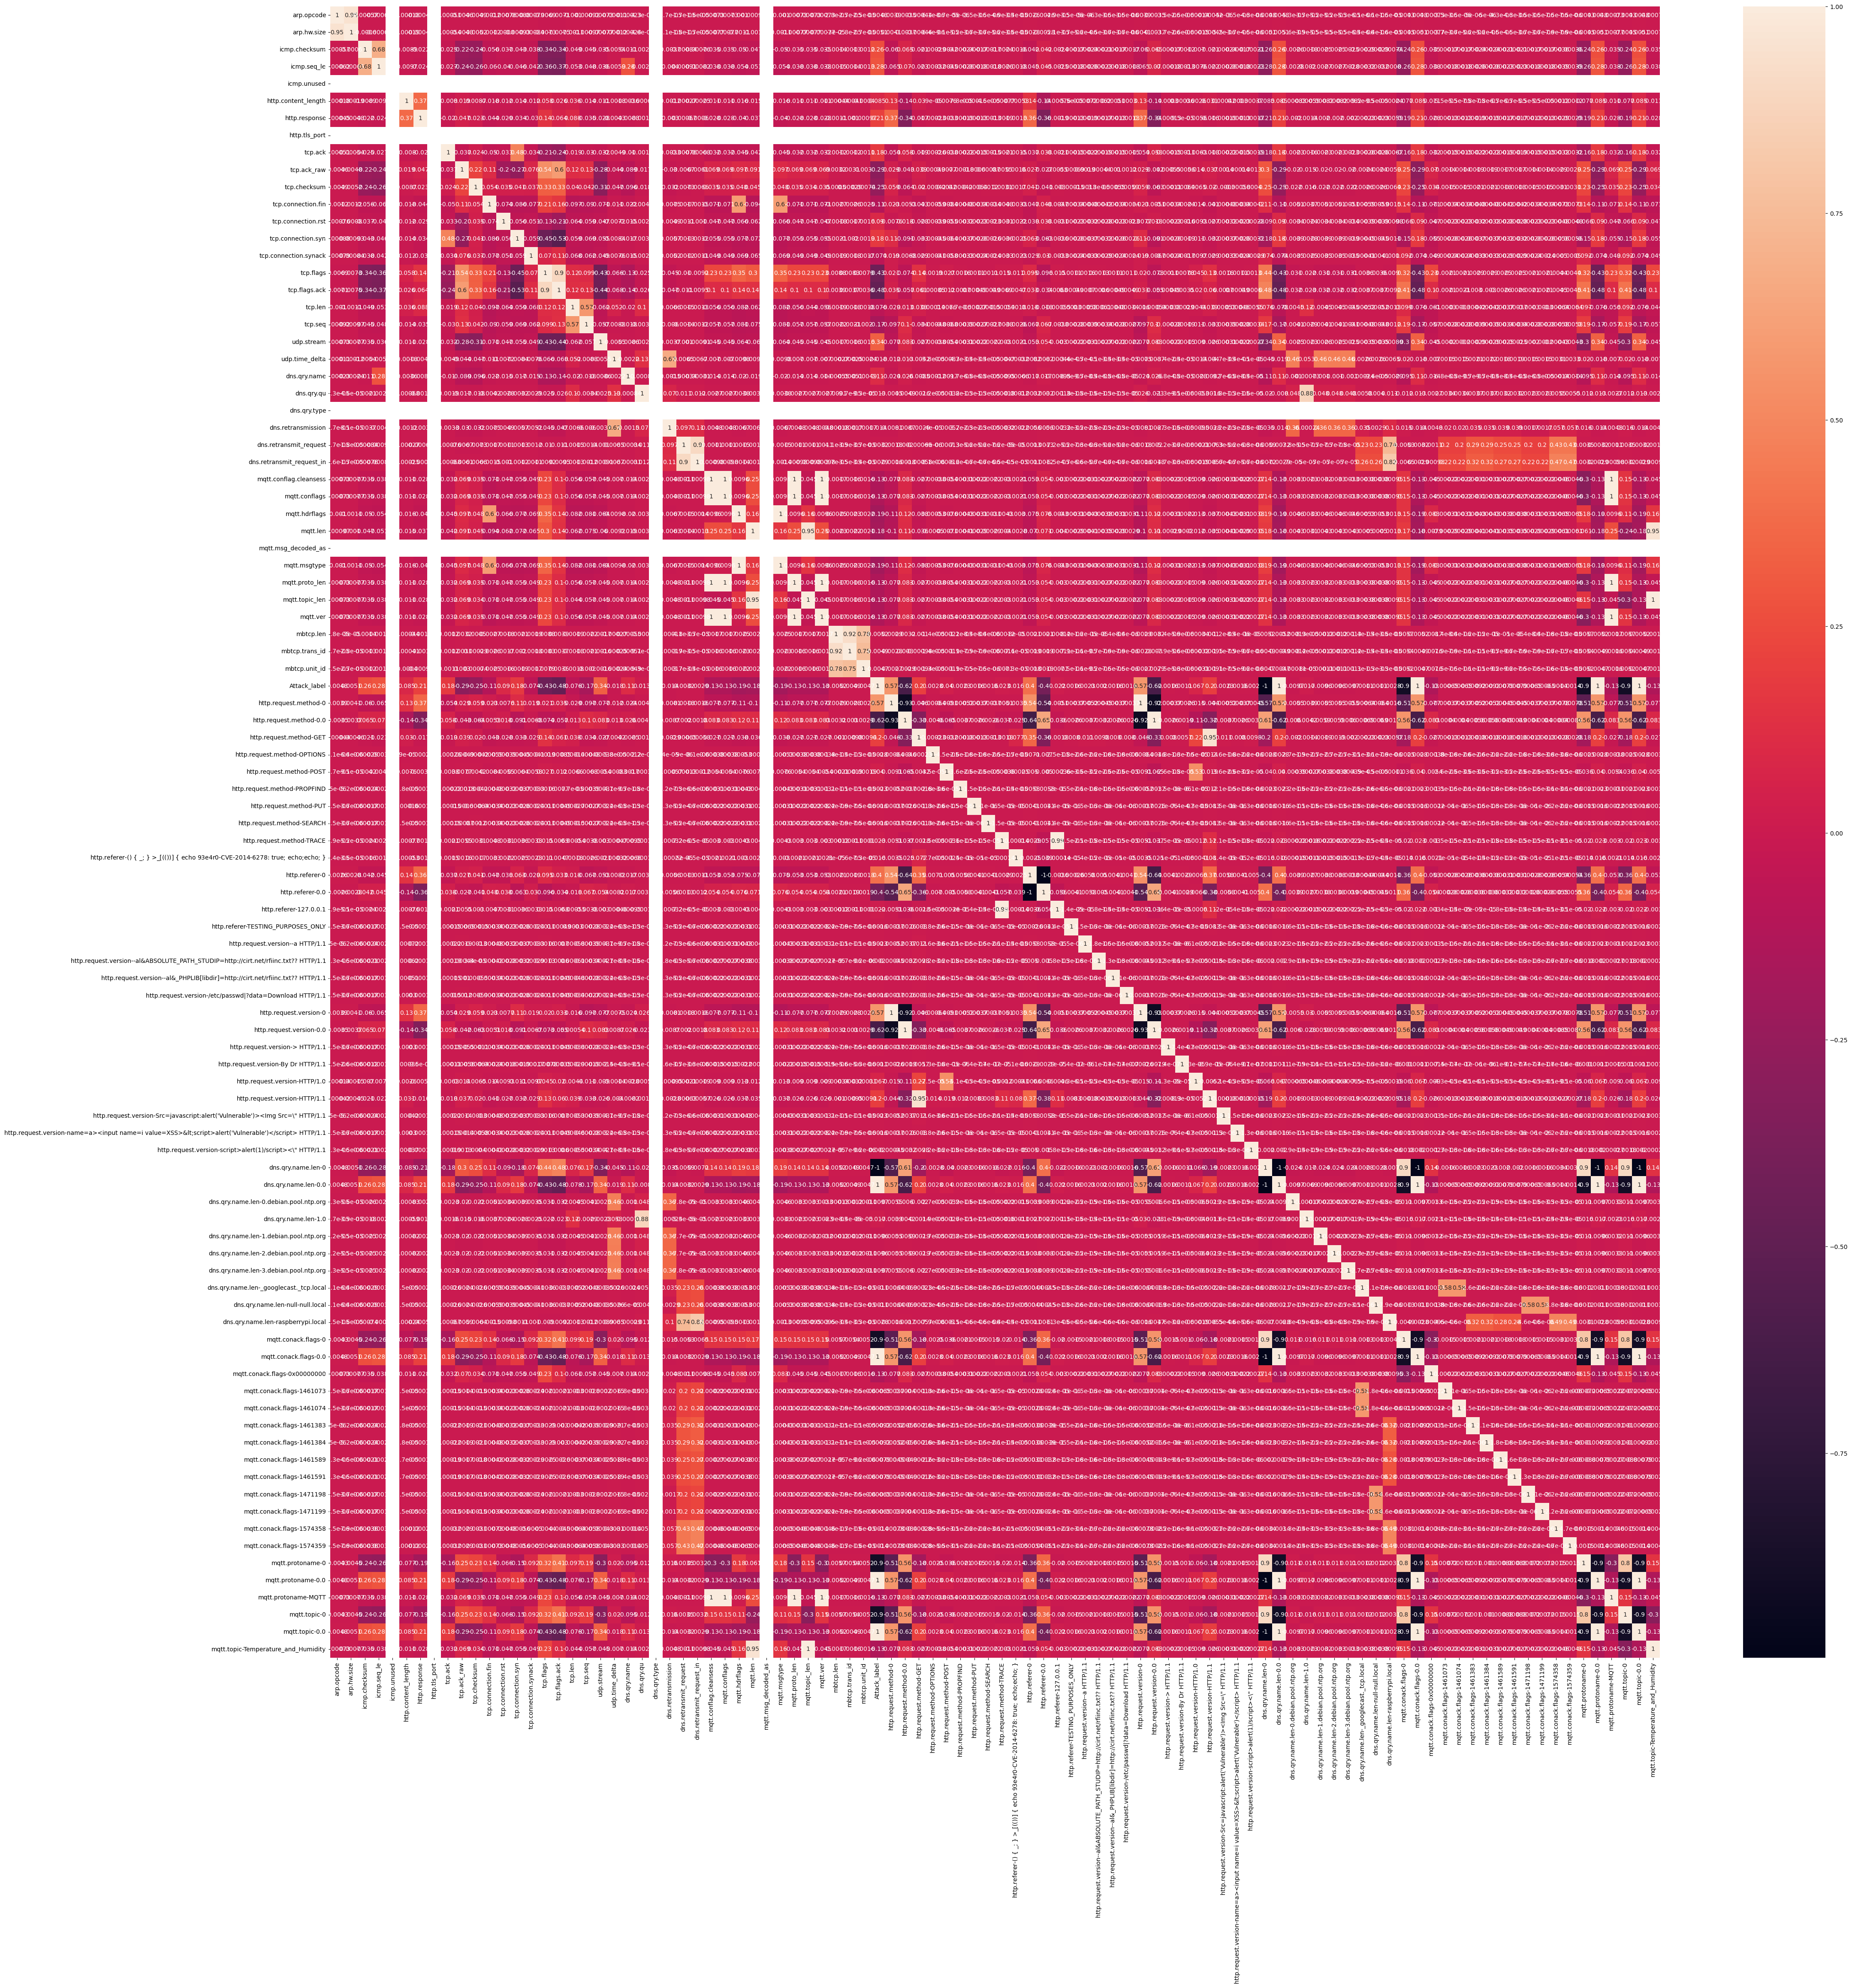

In [9]:
corr_matrix = df[feat_cols].corr()
fig = plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix, annot=True)

In [4]:
skip_list = ["icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as"]
# df[skip_list[3]].value_counts()

df.drop(skip_list, axis=1, inplace=True)
feat_cols = list(df.columns)
feat_cols.remove(label_col)
feat_cols

['arp.opcode',
 'arp.hw.size',
 'icmp.checksum',
 'icmp.seq_le',
 'http.content_length',
 'http.response',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.checksum',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.flags',
 'tcp.flags.ack',
 'tcp.len',
 'tcp.seq',
 'udp.stream',
 'udp.time_delta',
 'dns.qry.name',
 'dns.qry.qu',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_label',
 'http.request.method-0',
 'http.request.method-0.0',
 'http.request.method-GET',
 'http.request.method-OPTIONS',
 'http.request.method-POST',
 'http.request.method-PROPFIND',
 'http.request.method-PUT',
 'http.request.method-SEARCH',
 'http.request.method-TRACE',
 'http.referer-() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6278: true; ech

KeyboardInterrupt: 

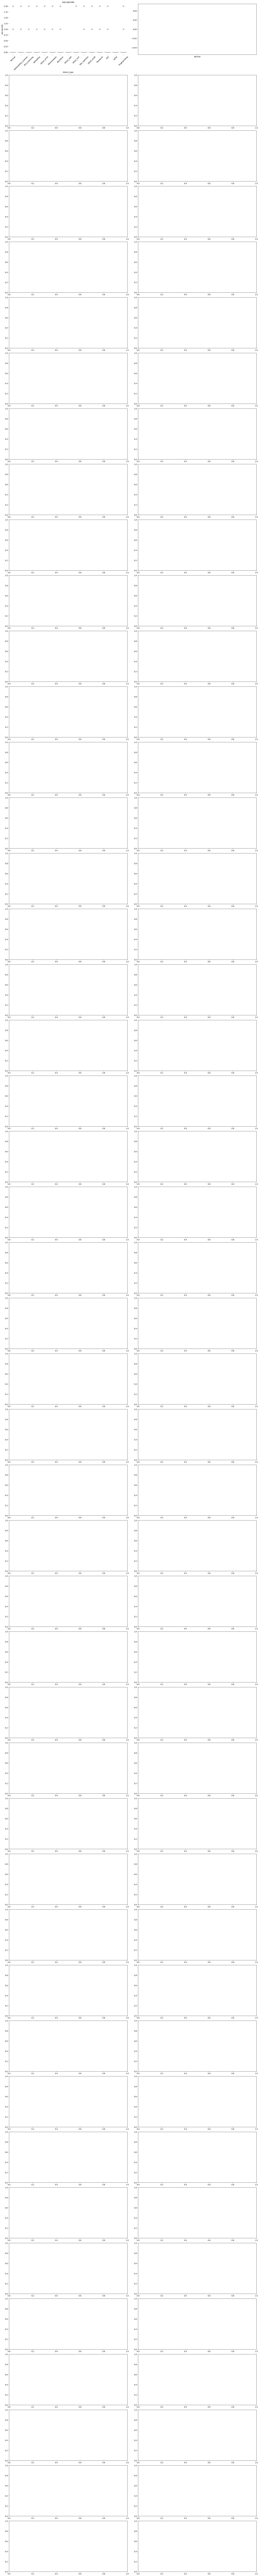

In [5]:
fig, axes= plt.subplots(len(feat_cols)//2, 2, figsize=(20,200), constrained_layout=True)
for i, x in enumerate(feat_cols):
    ax = axes[int(i/2), i%2]
    sns.boxplot(data=df, y=x, x=label_col, ax=ax)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    ax.set_title(x)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

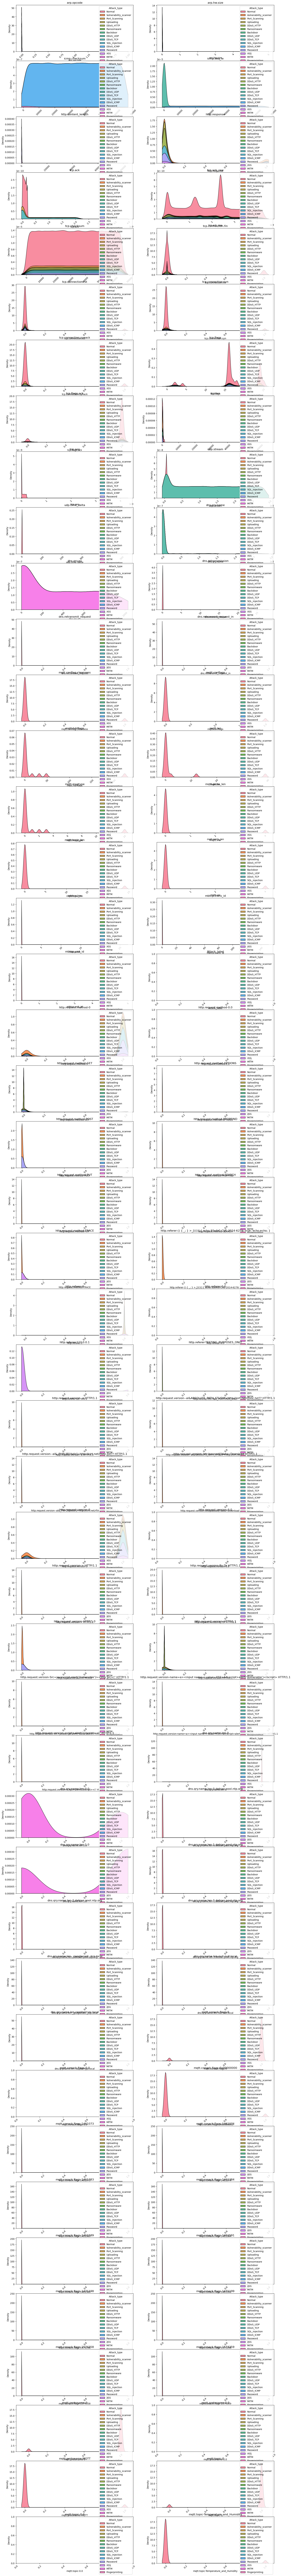

In [12]:
fig, axes = plt.subplots(len(feat_cols)//2, 2, figsize=(20,200))
for i, x in enumerate(feat_cols):
    ax = axes[int(i/2), i%2]
    sns.kdeplot(data=df, x=x, hue=label_col, multiple="stack", 
                warn_singular=False, alpha=0.8, ax=ax)
    ax.set_title(x)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

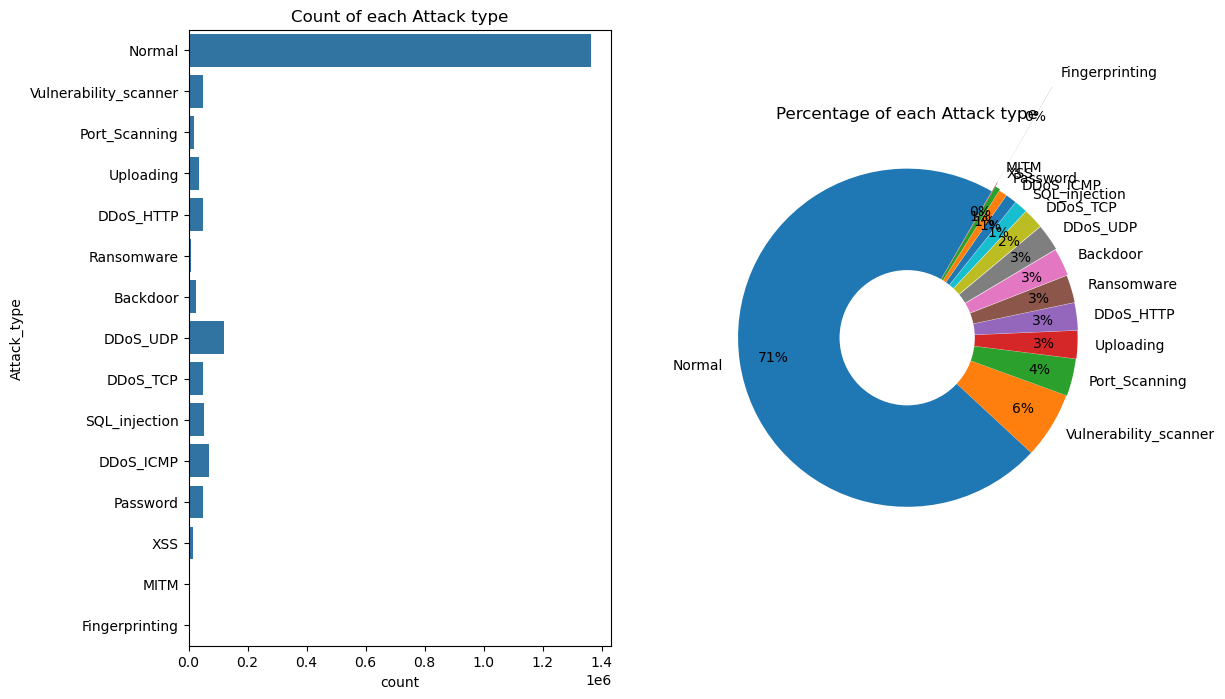

In [13]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[label_col].dropna().value_counts()))/sum(list(df[label_col].dropna().value_counts())))[::-1])[:]
labels = list(df[label_col].dropna().unique())[:]
sizes = df[label_col].value_counts()[:]

ax2.pie(sizes,  explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.8)
ax2.add_artist(plt.Circle((0,0),0.4,fc='white'))
sns.countplot(y=label_col, data=df, ax=ax1)
ax1.set_title("Count of each Attack type")
ax2.set_title("Percentage of each Attack type")
plt.show()

In [5]:
X = df.drop([label_col], axis=1)
y = df[label_col]

del df

In [6]:
X.shape

(1909671, 92)

In [7]:
y.shape

(1909671,)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# from sklearn.model_selection import StratifiedShuffleSplit

# # Assuming X and y are your feature matrix and target variable
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)

# for train_index, test_index in sss.split(X, y):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]



In [9]:
import numpy as np

# Assuming y_train and y_test are your target variables
unique_classes_train, counts_train = np.unique(y_train, return_counts=True)
unique_classes_test, counts_test = np.unique(y_test, return_counts=True)

# Print class distribution in training set
print("Class distribution in training set:")
for cls, count in zip(unique_classes_train, counts_train):
    print(f"Class {cls}: {count} samples")

# Print class distribution in testing set
print("\nClass distribution in testing set:")
for cls, count in zip(unique_classes_test, counts_test):
    print(f"Class {cls}: {count} samples")


Class distribution in training set:
Class Backdoor: 19221 samples
Class DDoS_HTTP: 38835 samples
Class DDoS_ICMP: 54351 samples
Class DDoS_TCP: 40050 samples
Class DDoS_UDP: 97253 samples
Class Fingerprinting: 682 samples
Class MITM: 286 samples
Class Normal: 1091198 samples
Class Password: 39946 samples
Class Port_Scanning: 15982 samples
Class Ransomware: 7751 samples
Class SQL_injection: 40661 samples
Class Uploading: 29446 samples
Class Vulnerability_scanner: 40021 samples
Class XSS: 12053 samples

Class distribution in testing set:
Class Backdoor: 4805 samples
Class DDoS_HTTP: 9709 samples
Class DDoS_ICMP: 13588 samples
Class DDoS_TCP: 10012 samples
Class DDoS_UDP: 24314 samples
Class Fingerprinting: 171 samples
Class MITM: 72 samples
Class Normal: 272800 samples
Class Password: 9987 samples
Class Port_Scanning: 3995 samples
Class Ransomware: 1938 samples
Class SQL_injection: 10165 samples
Class Uploading: 7361 samples
Class Vulnerability_scanner: 10005 samples
Class XSS: 3013 samp

In [10]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [11]:
label_encoder.classes_

array(['Backdoor', 'DDoS_HTTP', 'DDoS_ICMP', 'DDoS_TCP', 'DDoS_UDP',
       'Fingerprinting', 'MITM', 'Normal', 'Password', 'Port_Scanning',
       'Ransomware', 'SQL_injection', 'Uploading',
       'Vulnerability_scanner', 'XSS'], dtype=object)

In [12]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

input_shape = X_train.shape[1:]

print(X_train.shape, X_test.shape)
print(input_shape)



(1527736, 92) (381935, 92)
(92,)


In [21]:
print(np.unique(y_train))
num_classes = len(np.unique(y_train))
num_classes

[0. 1.]


2

In [18]:
from  tensorflow.keras.utils import to_categorical 

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

print(y_train.shape, y_test.shape)




(1527736, 15) (381935, 15)


In [22]:
print(y_train.shape)
print(y_train)

(1527736, 15)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
_features = X.shape[1]
n_classes = num_classes
print(_features, n_classes)

92 15


In [20]:
# DNN
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from sklearn import metrics

import uuid
import gc
from tensorflow import keras
import tensorflow as tf

In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import wandb


# Simple 4 Layer Dense Model
model = Sequential()
model.add(Dense(128, input_dim=_features, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(96, kernel_initializer='normal'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               11904     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 96)                

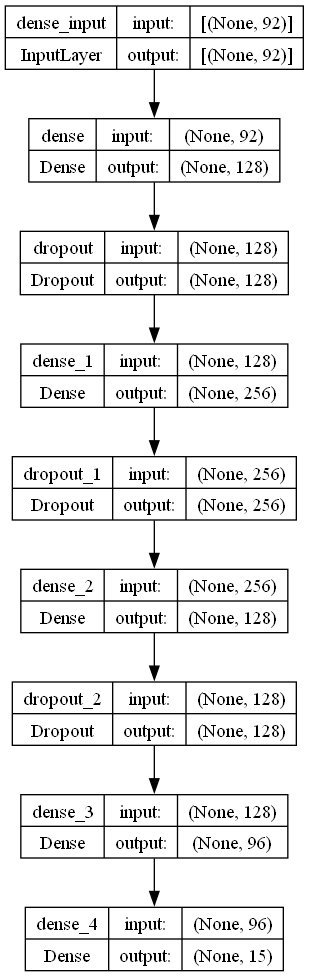

In [17]:
from keras.utils import plot_model

# ... (your model definition code)

# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
# Log in to WandB
wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# Initialize WandB run
wandb.init(project='dnn_run1')


# Compile the model
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Define callbacks (including WandB callback)
callbacks = [
    EarlyStopping(monitor='loss', patience=5),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001),
    wandb.keras.WandbCallback()
]

# Train the model with WandB logging
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=30,
    verbose=True,
    validation_data=(X_test, y_test),
    callbacks=callbacks
)


In [23]:
model.save('model_dnn.h5')

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import wandb

# Log in to WandB
wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# Initialize WandB run
wandb.init(project='dnn_fine_tune')

# Simple 4 Layer Dense Model
model = Sequential()
model.add(Dense(128, input_dim=_features, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(96, kernel_initializer='normal'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

# Compile the model
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Define callbacks (including WandB callback)
callbacks = [
    EarlyStopping(monitor='loss', patience=5),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001),
    wandb.keras.WandbCallback()
]

# Learning rate schedule
def lr_schedule(epoch):
    if epoch < 30:
        return 0.0001  # First 30 epochs with this learning rate
    elif epoch < 60:
        return 0.0001/4  # Next 30 epochs with a lower learning rate
    else:
        return 0.0001/6  # Last 30 epochs with an even lower learning rate

lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with WandB logging and learning rate schedule
history = model.fit(
    X_train, y_train,
    batch_size=256,
    epochs=90,  # Total epochs for fine-tuning
    verbose=True,
    validation_data=(X_test, y_test),
    callbacks=[callbacks, lr_scheduler]
)


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               11904     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 96)                

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/90


ValueError: in user code:

    File "C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\backend.py", line 5822, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 15) vs (None, 1)).


In [21]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import wandb

# Log in to WandB
wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# Initialize WandB run
wandb.init(project='dnn_fine_tune')


class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train[0]),
                                        y = y_train[0]                                                    
                                    )
class_weights = dict(zip(np.unique(y_train[0] ), class_weights))


# Simple 4 Layer Dense Model
model = Sequential()
model.add(Dense(128, input_dim=_features, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(96, kernel_initializer='normal'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

# Compile the model
opt = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Define callbacks (including WandB callback)
callbacks = [
    EarlyStopping(monitor='loss', patience=5),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001),
    wandb.keras.WandbCallback()
]

# Learning rate schedule
def lr_schedule(epoch):
    if epoch < 30:
        return 0.0001  # First 30 epochs with this learning rate
    elif epoch < 60:
        return 0.0001/4  # Next 30 epochs with a lower learning rate
    else:
        return 0.0001/6  # Last 30 epochs with an even lower learning rate

lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with WandB logging and learning rate schedule
history = model.fit(
    X_train, y_train,
    batch_size=256,
    epochs=100,  # Total epochs for fine-tuning
    verbose=True,
    validation_data=(X_test, y_test),
    callbacks=[callbacks, lr_scheduler],
    class_weight=class_weights  # Pass the class weights
)


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               11904     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 96)               

InvalidArgumentError: Graph execution error:

Detected at node GatherV2 defined at (most recent call last):
<stack traces unavailable>
indices[0] = 7 is not in [0, 2)
	 [[{{node GatherV2}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_1870]

In [13]:
print(np.unique(y_train))
print(np.unique(y_test))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [24]:
model.save('model3_dnn.h5')

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler

# Simple 4 Layer Dense Model with Increased Complexity
model = Sequential()
model.add(Dense(256, input_dim=_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

# Compile the model
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Define callbacks
callbacks = [
    EarlyStopping(monitor='loss', patience=5),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001),
]

# Learning rate schedule
def lr_schedule(epoch):
    if epoch < 50:
        return 0.0002  # First 30 epochs with this learning rate
    elif epoch < 80:
        return 0.0001  # Next 30 epochs with a lower learning rate
    else:
        return 0.00005  # Last 30 epochs with an even lower learning rate

lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=110,
    verbose=True,
    validation_data=(X_test, y_test),
    callbacks=[callbacks, lr_scheduler]
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               23808     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [17]:
model.save('model2_dnn.h5')

In [20]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import wandb

# Log in to WandB
wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# Initialize WandB run
wandb.init(project='dnn_fine_tune_validate')

start = dt.datetime.now()

escore = model.evaluate(X_test, y_test, batch_size=32)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)
#roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


11936/11936 [==============================] - 11s 905us/step
Completed
Time taken: 0:00:29.103639
Validation score: 0.9485043266524409
Evaluation score: [0.011947267688810825, 0.9485043287277222]
Recall score: 0.9485043266524409
Precision score: 0.960497050517327
F1 Measure score: 0.9440148922194241
ROC-AUC score: 0.8857192668344782


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# import wandb

# # Log in to WandB
# wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# # Initialize WandB run
# wandb.init(project='tinyml_project')

# Simple TinyML Model
model = Sequential()
model.add(Dense(32, input_dim=_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

# Compile the model
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Define callbacks (including WandB callback)
callbacks = [
    EarlyStopping(monitor='loss', patience=5),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001),
#     wandb.keras.WandbCallback()
]

# Train the model with WandB logging
history = model.fit(
    X_train, y_train,
    batch_size=32,  # Adjusted batch size for TinyML
    epochs=15,  # Reduced epochs for simplicity
    verbose=True,
    validation_data=(X_test, y_test),
    callbacks=callbacks
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2976      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 15)                255       
                                                                 
Total params: 3,759
Trainable params: 3,759
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
47742/47742 [==============================

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# import wandb

# # Log in to WandB
# wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# # Initialize WandB run
# wandb.init(project='tinyml_project')

# TinyML Model with Convolutional Layers
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(_features, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

# Compile the model
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Define callbacks (including WandB callback)
callbacks = [
    EarlyStopping(monitor='loss', patience=5),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001),
#     wandb.keras.WandbCallback()
]

# Train the model with WandB logging
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=15,
    verbose=True,
    validation_data=(X_test, y_test),
    callbacks=callbacks
)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 90, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 45, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 43, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 21, 64)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 1344)              0         
                                                                 
 dense (Dense)               (None, 32)               

KeyboardInterrupt: 

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow import keras

In [25]:
# Reshape the input for DCNN
X_train = X_train.reshape(X_train.shape[0], _features, 1).astype('int32')
X_test = X_test.reshape(X_test.shape[0], _features, 1).astype('int32')

In [26]:
X_train.shape



(1527736, 92, 1)

In [27]:
y_train.shape

(1527736, 15)

In [ ]:
# DCNN Model
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=6, dilation_rate=1, input_shape=(_features, 1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=6, dilation_rate=2))
model.add(Activation('relu'))
model.add(Conv1D(filters=128, kernel_size=6, dilation_rate=3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(96, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=30,
    verbose=True,
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr, early_stop_callback]
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 87, 64)            448       
                                                                 
 activation (Activation)     (None, 87, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 43, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 33, 128)           49280     
                                                                 
 activation_1 (Activation)   (None, 33, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 18, 64)            49216     
                                                        

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow import keras

# DCNN Model with Reduced Complexity
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=6, dilation_rate=1, input_shape=(_features, 1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=6, dilation_rate=2))
model.add(Activation('relu'))
model.add(Conv1D(filters=64, kernel_size=6, dilation_rate=3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=30,
    verbose=True,
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr, early_stop_callback]
)


In [27]:
# from keras.models import Sequential
# from keras.layers import Dense, LSTM, GRU, Dropout, Embedding, Bidirectional
# from tensorflow import keras
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# # import wandb
# embedding_dim = 50
# max_sequence_length = 92  
# # # Log in to WandB
# # wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# # # Initialize WandB run
# # wandb.init(project='lstm_gru_model')

# # Define the LSTM-GRU model
# model = Sequential()
# model.add(Embedding(input_dim=_features, output_dim=embedding_dim, input_length=max_sequence_length))
# model.add(Bidirectional(LSTM(128, return_sequences=True)))
# model.add(Dropout(0.2))
# model.add(Bidirectional(GRU(64)))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(n_classes, activation='softmax'))

# model.summary()

# # Compile the model
# opt = keras.optimizers.Adam(learning_rate=0.0001)
# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# # Define callbacks (including WandB callback)
# callbacks = [
#     EarlyStopping(monitor='loss', patience=5),
#     ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001),
# #     wandb.keras.WandbCallback()
# ]

# # Train the model with WandB logging
# history = model.fit(
#     X_train, y_train,
#     batch_size=128,
#     epochs=30,
#     verbose=True,
#     validation_data=(X_test, y_test),
#     callbacks=callbacks
# )


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 92, 50)            4600      
                                                                 
 bidirectional_2 (Bidirectio  (None, 92, 256)          183296    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 92, 256)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              123648    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)               


KeyboardInterrupt



wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


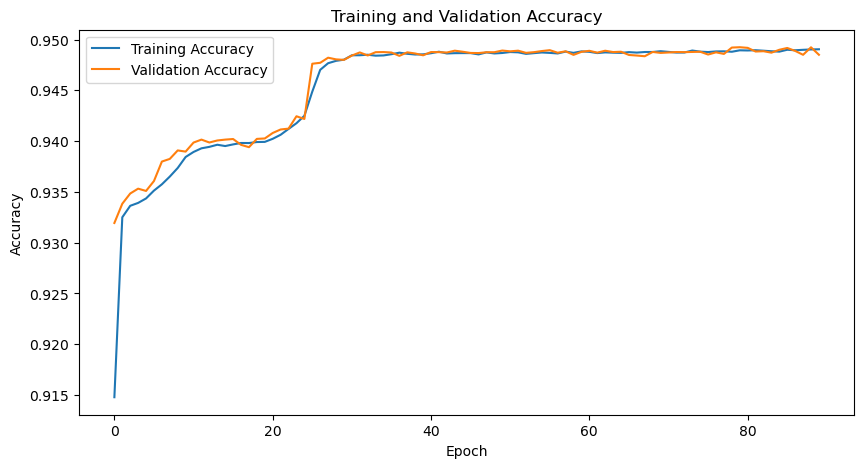

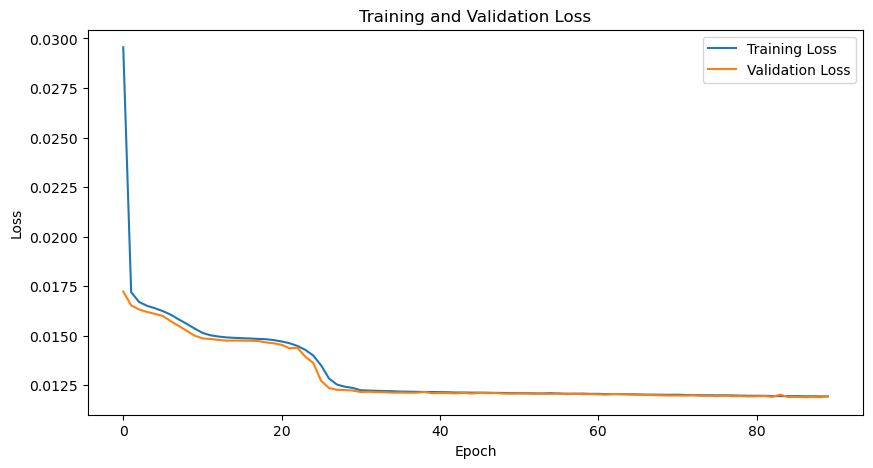

In [22]:
import wandb
import matplotlib.pyplot as plt

# Log in to WandB (if not already logged in)
wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# Initialize WandB run
run_path = "ganmaster/dnn_fine_tune/ilziacl9"
api = wandb.Api()
run = api.run(run_path)

# Access logged metrics
history = run.scan_history()

# Plot accuracy and val_accuracy
epochs = []
train_accuracy = []
val_accuracy = []

for entry in history:
    if 'accuracy' in entry:
        epochs.append(entry['epoch'])
        train_accuracy.append(entry['accuracy'])
        val_accuracy.append(entry['val_accuracy'])

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_plot.png')  # Save the plot
plt.show()

# Plot loss and val_loss
train_loss = []
val_loss = []

for entry in history:
    if 'loss' in entry:
        train_loss.append(entry['loss'])
        val_loss.append(entry['val_loss'])

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_plot.png')  # Save the plot
plt.show()


C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


11936/11936 [==============================] - 11s 901us/step


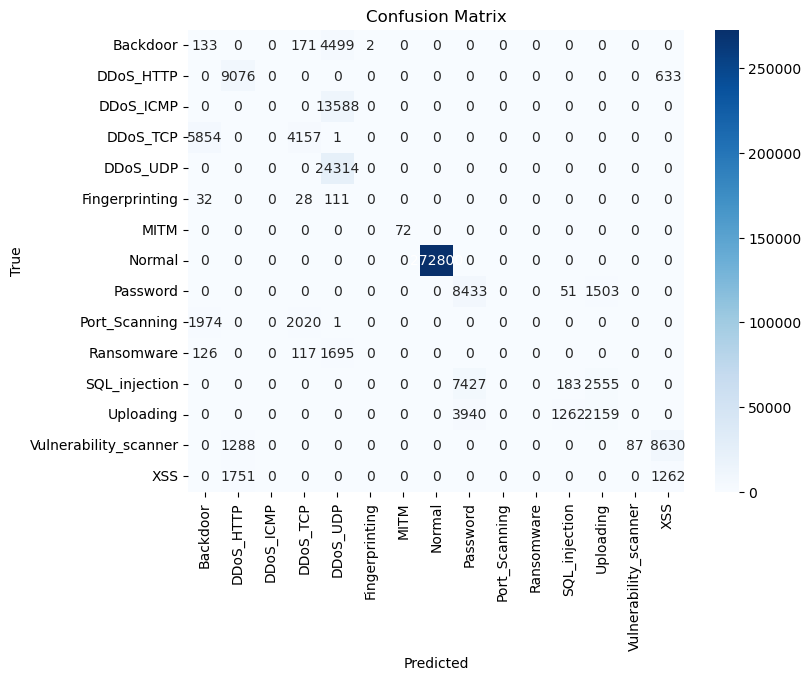

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                        precision    recall  f1-score   support

             Backdoor       0.02      0.03      0.02      4805
            DDoS_HTTP       0.75      0.93      0.83      9709
            DDoS_ICMP       0.00      0.00      0.00     13588
             DDoS_TCP       0.64      0.42      0.50     10012
             DDoS_UDP       0.55      1.00      0.71     24314
       Fingerprinting       0.00      0.00      0.00       171
                 MITM       1.00      1.00      1.00        72
               Normal       1.00      1.00      1.00    272800
             Password       0.43      0.84      0.57      9987
        Port_Scanning       0.00      0.00      0.00      3995
           Ransomware       0.00      0.00      0.00      1938
        SQL_injection       0.12      0.02      0.03     10165
            Uploading       0.35      0.29      0.32      7361
Vulnerability_scanner       1.00      0.01      0.02     10005
                  XSS       0.

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import load_model

# Load the DNN model
model = load_model('model3_dnn.h5')

# Assuming X_train, X_test, y_train, and y_test are already defined
# (as in your provided code)

# Process and reshape the data
X_test_processed = min_max_scaler.transform(X_test.reshape(X_test.shape[0], -1))
X_test_processed = X_test_processed.reshape(X_test_processed.shape[0], -1, 1)

# Predictions
y_pred_prob = model.predict(X_test_processed)
y_pred_encoded = np.argmax(y_pred_prob, axis=1)

# Assuming label_encoder is already defined
# (as in your provided code)
# Inverse transform predicted labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Inverse transform true labels (assuming y_test was one-hot encoded)
y_true = label_encoder.inverse_transform(np.argmax(y_test, axis=1))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred))
